<a href="https://colab.research.google.com/github/irvansikajudin/Data-Science/blob/main/EDA_OF_WA_Fn_UseC__Telco_Customer_Churn_csv_DATESET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libarary

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data science/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1320,8947-YRTDV,Male,0,Yes,Yes,32,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,94.80,3131.55,No
4764,2962-XPMCQ,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.15,98.5,Yes
1951,8735-IJJEG,Male,0,Yes,No,14,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),50.20,668.85,No
940,0835-DUUIQ,Female,0,No,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),21.05,531.55,No
3879,7359-PTSXY,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.75,45.75,Yes


# Data Preperation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


observasi : 

1. pengelihatan sementara tidak ada missing values
2. data tipe TotalCharges seharusnya float bukan object

## Cek Missing Values

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Melihat kolom dalam bentul list

In [ ]:
# mengambil dan menampilkan nama kolom
column_names =[]
for col in df.columns:
    column_names.append(col)
print(column_names)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Cek Missing Values (Advance)

In [ ]:
#cek missing value lebih dalam dgn mendefinisikan value tertentu sebagai missing value
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', ' ']
df = pd.read_csv('/content/drive/MyDrive/data science/WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values = missing_values)
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

observasi :

1. ada missing values pada TotaclCharges sebanyak 11 baris

### Menampilkan Missing Values (Advance)

In [ ]:
#menampilkan nilai nan di kolom TotalCharges
df1 = df[df.isna().any(axis=1)]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# untuk membuktikan ada missing value sebelum menggunakan value tertentu sebagai missing value
# kita panggil ulang datasetnya
# masukkan nilai index yg ditunjukkan sebagai missing value pada metode sebelumnya
# kode ini hanya catatan, jika perlu di run, jika ga ya ga usah hehe
# df = pd.read_csv(pd.read_csv('/content/drive/MyDrive/data science/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df.loc[488]

### Syarat drop missing Values

In [ ]:
# percentage version, jika kurang dari 5 persen , cukup yakin dapat di drop value yang hilang
df.isna().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [ ]:
(7032/7043)*100

99.84381655544512

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#menunjukkan hasil setelah missing values dibuang menjadi 7032
len(df)

7032

## Cek Duplicate

In [ ]:
df.duplicated().sum()

0

## Merubah tipe data

In [ ]:
# karena TotalCharges masih berbentuk object maka saya ingin mengubah menjadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

## Pengelompokan sesuai tipe data

In [ ]:
# store columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns


# display columns
print('\nint64 columns:\n', integer_columns)
print('\nfloat64 columns:\n', float_columns)
print('\nobject columns:\n', object_columns)




int64 columns:
 Index(['SeniorCitizen', 'tenure'], dtype='object')

float64 columns:
 Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

object columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
categoricals = list(object_columns)
numericals = list(integer_columns.append(float_columns))
print('numericals', numericals)
print('categoricals', categoricals)

numericals ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categoricals ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Data Understanding

## numerical statistical sumary

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation :

1. SeniorCitizen column is boolean/binary column since the value is 0 or 1
2. Overall, the minimum and maximum values make sense for each column
3. count indicates 7032 data is not missing, because missing values have been removed
4. 25 % =  Q1, 50 % =  Q2, 75 % =  Q3 
5. Mean ~ 50% (Median) all of colums has not indicating somewhat a symmetrical distribution
6. Mean > 50% (Median) in tenure column and TotalCharges, indicating both are slight positively skewed distribution
7. Mean < 50% (Median) in MonthlyCharges column, indicating both are slight negatively skewed 
   distribution


In [ ]:
# describe method on categorical data
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:

1. 'gender' have 2 unique value, male and female, The value that often appears is 'male' with 3549 occurrences
2. 'Parthner' have 2 unique value, yes and no , The value that often appears is 'No' with 3639 occurrences
3. 'Dependents' have 2 unique value, yes and no, The value that often appears is 'NO' with 4933 occurrences
4. 'PhoneService' have 2 unique value, yes and no, The value that often appears is 'Yes' with 6352 occurrences
5. 'MultipleLines' have 2 unique value, yes and no, The value that often appears is 'No' with 3385 occurrences
6. 'InternetService' have 3 unique value, Fiber Optic, DSL and NO, The value that often appears is 'Fiber
    optic' with 3096 occurrences
7. 'OnlineSecurity' have 3 unique value, no, yes and no internet service, The value that often appears is 'no' 
    with 3497 occurrences
8. 'OnlineBackup' have 3 unique value, yes, no and no internet service, The value that often appears is 'no' 
    with 3087 occurrences
9. 'DeviceProtection' have 3 unique value, yes, no and no internet service, The value that often appears is 
    'no' with 3094 occurrences
10. 'TechSupport' have 3 unique value, yes, no and no internet service, The value that often appears is 'no' 
    with 3472 occurrences
11. 'StreamingTV' have 3 unique value, yes, no and no internet service, The value that often appears is 'no' 
    with 2809 occurrences
12. 'StreamingMovies' have 3 unique value, yes, no and no internet service, The value that often appears is 
    'no' with 2781 occurrences
13. 'Contract' have 3 unique value, Month-to-month, Two year and One year, The value that often appears is 
    'Month-to-month' with 3875 occurrences
14. 'PaperlessBilling' have 2 unique value, yes and no, The value that often appears is 'yes' with 4168 
    occurrences
15. 'PaymentMethod' have 4 unique value, Electronic check, Mailed check, Bank transfer (automatic) and Credit 
     card (automatic), The value that often appears is 'Electronic check' with 2365 occurrences
16. 'Churn' have 2 unique value, yes and no, The value that often appears is 'no' with 5163 occurrences

### menunjukkan unik value pada kolom

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many numericals columns
for col in numericals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64 

Value counts of TotalCharges column
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64 



# Univariate Analysis

## Boxplot to detect outliers

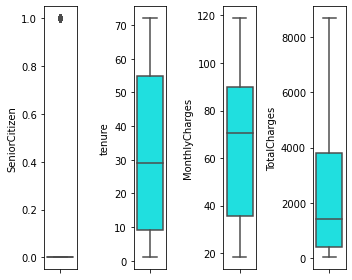

In [ ]:
plt.figure(figsize=(5,4))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Pada kolom SeniorCitizen tidak ada outliers sebab nilai pada kolom tersebut adalah data kategori 0 dan 1 , dan itu normal, begitu juga pada kolom lainnya tidak memiliki outliers

## KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

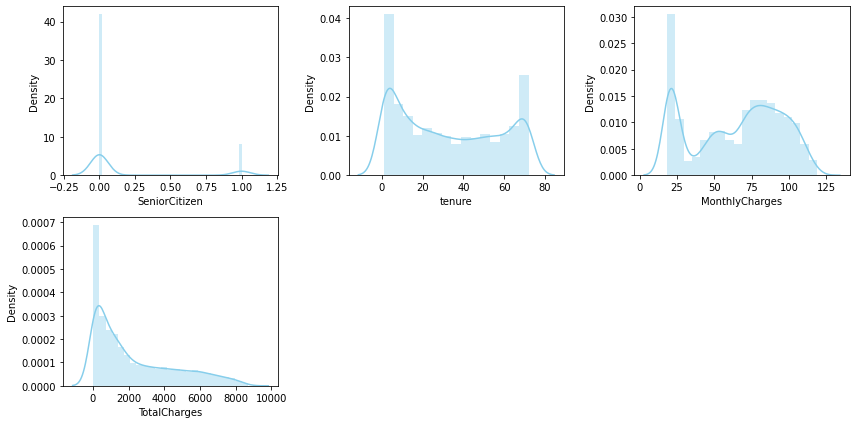

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

1. SeniorCitizen adalan value bolean, 0 dan 1.
2. all of colums hdoes not have a symmetric distribution
3. tenure column and TotalCharges, they are  positively skewed distribution
4. MonthlyCharges column,  slight negatively skewed distribution

# Bivariate Analysis

In [ ]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


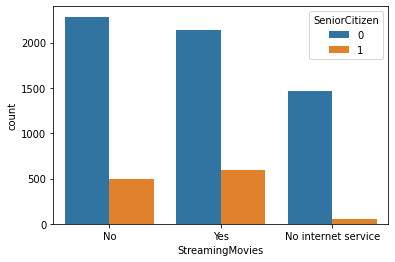

In [ ]:
# SeniorCitizen affect StreamingMovies?
sns.countplot(data=df,x='StreamingMovies',hue='SeniorCitizen')

Observasi 

1. SeniorCitizen = 1 , dan 0 bukan SeniorCitizen
2. yang bukan SeniorCitizen lebih sedikit menonton movie



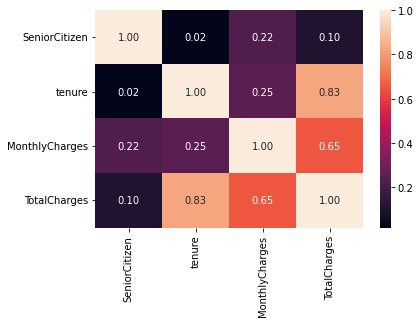

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observasi : 

1. tenure and TotalCharges are highly correlated each other
2. all variables have a positive effect and only tenure and total charges have a high and positive correlation
3. monthlycharges only has a correlation of 0.65 with totalcharges, tenure and total charges the correlation   
   is high and positive, besides that it is low but positive

# Multivariate Analysis

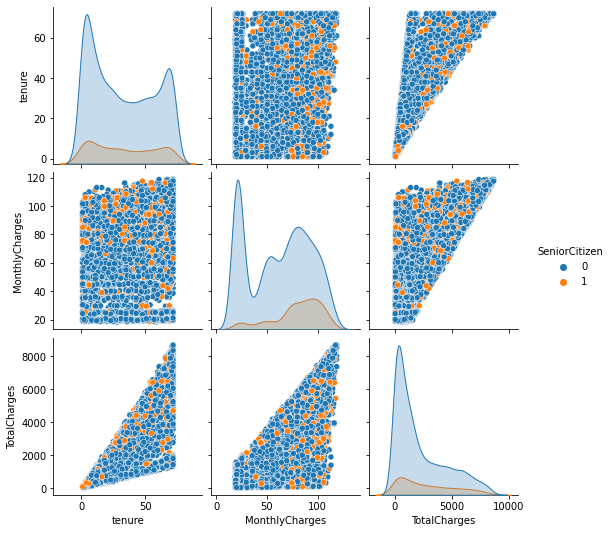

In [ ]:
# pairplot of the data
sns.pairplot(df, hue='SeniorCitizen')

Observation : 

1. lebih sedikit populasi SeniorCitizen dari pada yang bukan yang terdaftar pada layanan
2. SeniorCitizen lebih sedikit waktu berlangganan dari pada yang bukan SeniorCitizen
3. secara umum biaya tagihan layanan lebih banyak dan lebih tinggi pada yang bukan SeniorCitizen


# EDA Conclusion

1. terdapat missing values dan sudah diolah suckupunya
2. min dan max  values saya rasa masuk akal
3. tidak memiliki distribusi yang simetris
3. tidak ada outliers
4. secara umum SeniorCitizen tagihannya lebih sedikit dibanding yang bukan SeniorCitizen
5. dari heatmap kita bisa lihat tenure dan TotalCharges memiliki korelasi, kita bisa pilih untuk modeling

# Perform deep-dive exploration

1. menemukan nilai max, min, sum dan mean MonthlyCharges dan TotalCharges berdasarkan SeniorCitizen
2. siapa 5 orang yang nilai TotalChargesnya tertinggi
3. siapa 5 orang yang nilai TotalChargesnya terendah

In [ ]:
# a = df[df['PaymentMethod'] == 'Bank transfer (automatic)']
# a

In [ ]:
max = df.groupby(['SeniorCitizen']).agg(
    max_MonthlyCharges = ('MonthlyCharges','max'),
    max_TotalCharges = ('TotalCharges','max')
).reset_index()


max

,SeniorCitizen,max_MonthlyCharges,max_TotalCharges
0,0,118.75,8684.8
1,1,117.45,8443.7


In [ ]:
min = df.groupby('SeniorCitizen').agg(
    min_MonthlyCharges = ('MonthlyCharges','min'),
    min_TotalCharges = ('TotalCharges','min')
).reset_index()

min

,SeniorCitizen,min_MonthlyCharges,min_TotalCharges
0,0,18.25,18.80
1,1,18.95,19.45


In [ ]:
summean = df.groupby('SeniorCitizen').agg(
    sum_MonthlyCharges = ('MonthlyCharges','sum'),
    mean_TotalCharges = ('TotalCharges','mean')
).reset_index()

summean

,SeniorCitizen,sum_MonthlyCharges,mean_TotalCharges
0,0,364506.15,2181.089550
1,1,91154.85,2810.465193


In [ ]:
# 5 orang tertinggi nilai TotalChargesnya
totalCharges = df.sort_values("TotalCharges", ascending=False, inplace=True)
df[["customerID", "TotalCharges"]].head(5)

,customerID,TotalCharges
4610,2889-FPWRM,8684.80
4586,7569-NMZYQ,8672.45
6768,9739-JLPQJ,8670.10
5347,9788-HNGUT,8594.40
2187,8879-XUAHX,8564.75


In [ ]:
# 5 orang terendah nilai TotalChargesnya
totalCharges = df.sort_values("TotalCharges", ascending=True, inplace=True)
df[["customerID", "TotalCharges"]].head(5)

,customerID,TotalCharges
1654,2967-MXRAV,18.80
6489,9318-NKNFC,18.85
1151,8992-CEUEN,18.85
4939,9975-SKRNR,18.90
583,1423-BMPBQ,19.00
